In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from keras.layers import AveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization,Activation
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.2,random_state=42)

In [ ]:
# Tamaño del conjunto de datos de entrenamiento
print(x_train.shape)
print(y_train.shape)

(48000, 28, 28)
(48000,)


In [ ]:
# Tamaño del conjunto de datos de prueba
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [ ]:
print(x_val.shape)
print(y_val.shape)

(12000, 28, 28)
(12000,)


In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
print('Valor mínimo: ', x_train.min())
print('Valor máximo: ',x_train.max())

Valor mínimo:  0
Valor máximo:  255


In [ ]:
 #Reescalar  imágenes
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val=x_val/255

In [ ]:
print('Valor mínimo: ', x_train.min())
print('Valor máximo: ', x_train.max())

Valor mínimo:  0.0
Valor máximo:  1.0


In [ ]:
def visualize_dataset(n,x,y):
    plt.figure(figsize=(10,10))
    for i in range(n*n):
        plt.subplot(n,n,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        plt.xlabel(y[i])
    plt.show()

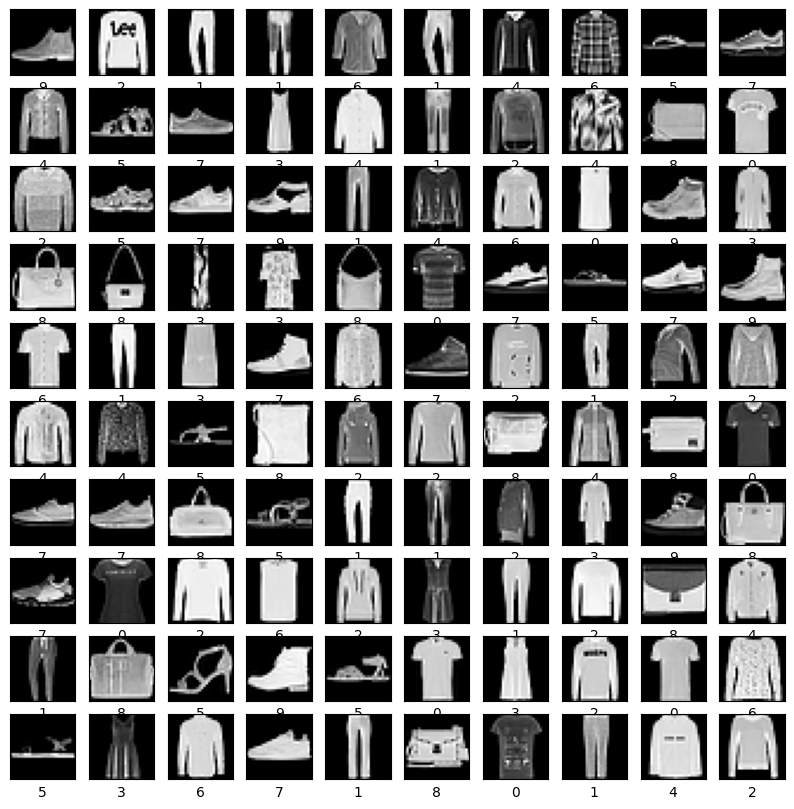

In [ ]:
visualize_dataset(10,x_test,y_test)

In [ ]:
def visualize_labels(y,visualize=False):
    unique, counts = np.unique(y, return_counts=True) # Encuentra los elementos únicos de un array
    print('Clases: ', unique)
    print('Número de instancias por clase', counts)

    if visualize == True:
        plt.figure(figsize=(11,5))
        plt.bar(unique,counts, color = (0.3,0.1,0.4,0.6))
        plt.xlabel('Clases')
        plt.ylabel('Frecuencia')
        plt.xticks(unique)

        for i, v in enumerate(counts):
            plt.text(i-0.25, v+10, str(v), color = 'blue')
        plt.show()


Clases:  [0 1 2 3 4 5 6 7 8 9]
Número de instancias por clase [4798 4781 4795 4816 4798 4789 4782 4841 4803 4797]


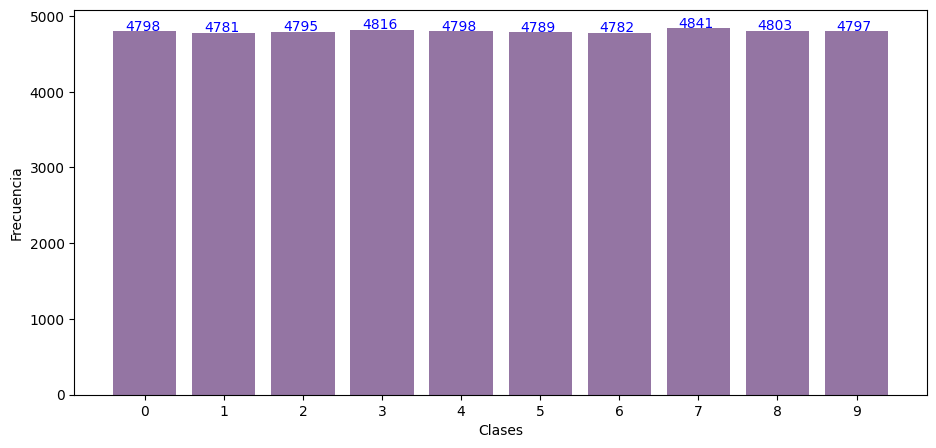

In [ ]:
visualize_labels(y_train, True)

In [ ]:
model = Sequential()
model.add(Conv2D(134,3,1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(2, 2))
model.add(Dropout(0.4))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Conv2D(64,3,1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.build((None, 28, 28, 1)) # `input_shape` is the shape of the input data
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 134)       1340      
                                                                 
 batch_normalization_4 (Bat  (None, 26, 26, 134)       536       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 26, 26, 134)       0         
                                                                 
 average_pooling2d_1 (Avera  (None, 13, 13, 134)       0         
 gePooling2D)                                                    
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 134)       0         
                                                                 
 dense_3 (Dense)             (None, 13, 13, 64)       

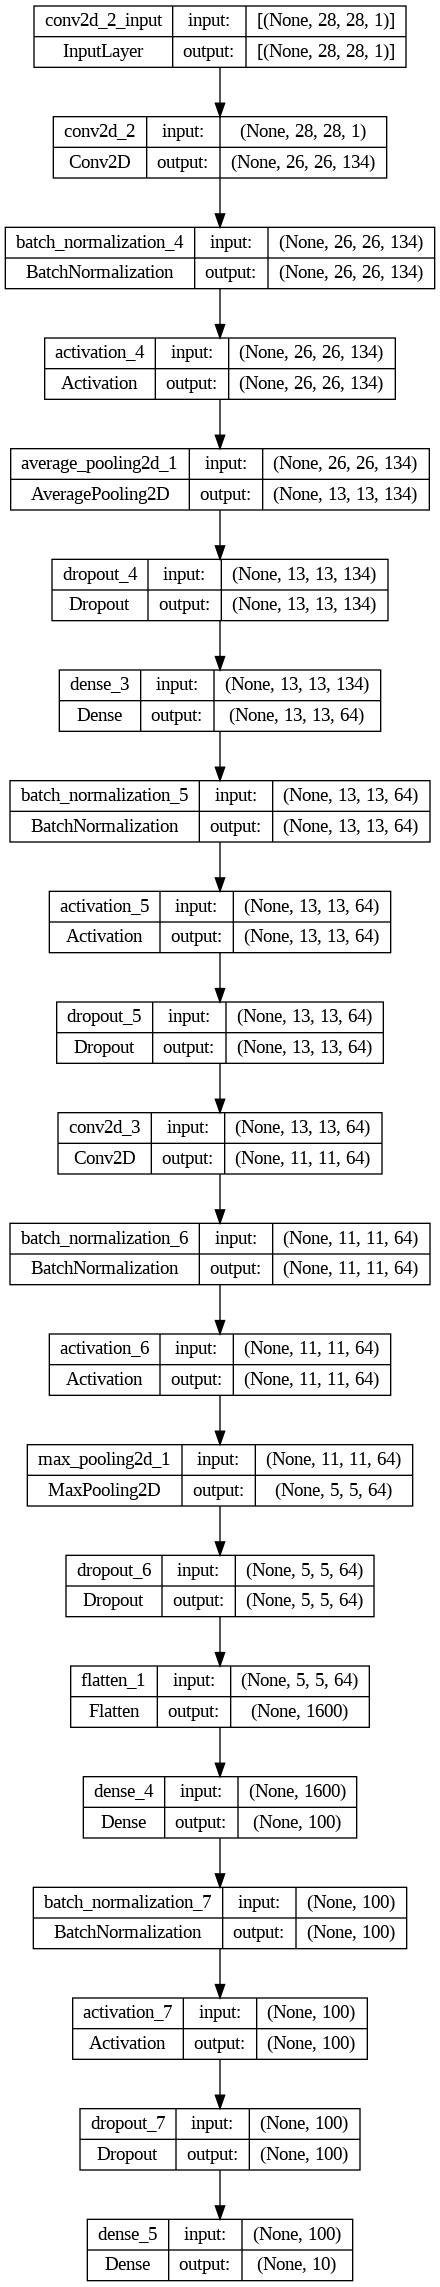

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10,  mode='min',  verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint("best_model_Mnist.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks=[es, checkpoint] ,epochs=50,verbose=1)

Epoch 1/50
1494/1500 [============================>.] - ETA: 0s - loss: 0.5711 - accuracy: 0.7908
Epoch 1: val_loss improved from inf to 0.38736, saving model to best_model_Mnist.h5
1500/1500 [==============================] - 14s 8ms/step - loss: 0.5712 - accuracy: 0.7909 - val_loss: 0.3874 - val_accuracy: 0.8572
Epoch 2/50
  19/1500 [..............................] - ETA: 8s - loss: 0.4162 - accuracy: 0.8355

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1494/1500 [============================>.] - ETA: 0s - loss: 0.3996 - accuracy: 0.8522
Epoch 2: val_loss improved from 0.38736 to 0.35303, saving model to best_model_Mnist.h5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3997 - accuracy: 0.8522 - val_loss: 0.3530 - val_accuracy: 0.8663
Epoch 3/50
1495/1500 [============================>.] - ETA: 0s - loss: 0.3526 - accuracy: 0.8709
Epoch 3: val_loss improved from 0.35303 to 0.30974, saving model to best_model_Mnist.h5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3525 - accuracy: 0.8710 - val_loss: 0.3097 - val_accuracy: 0.8859
Epoch 4/50
1496/1500 [============================>.] - ETA: 0s - loss: 0.3294 - accuracy: 0.8788
Epoch 4: val_loss did not improve from 0.30974
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3289 - accuracy: 0.8789 - val_loss: 0.3382 - val_accuracy: 0.8715
Epoch 5/50
1495/1500 [============================>.] - ETA: 0s - loss: 0.3103 - accuracy: 0

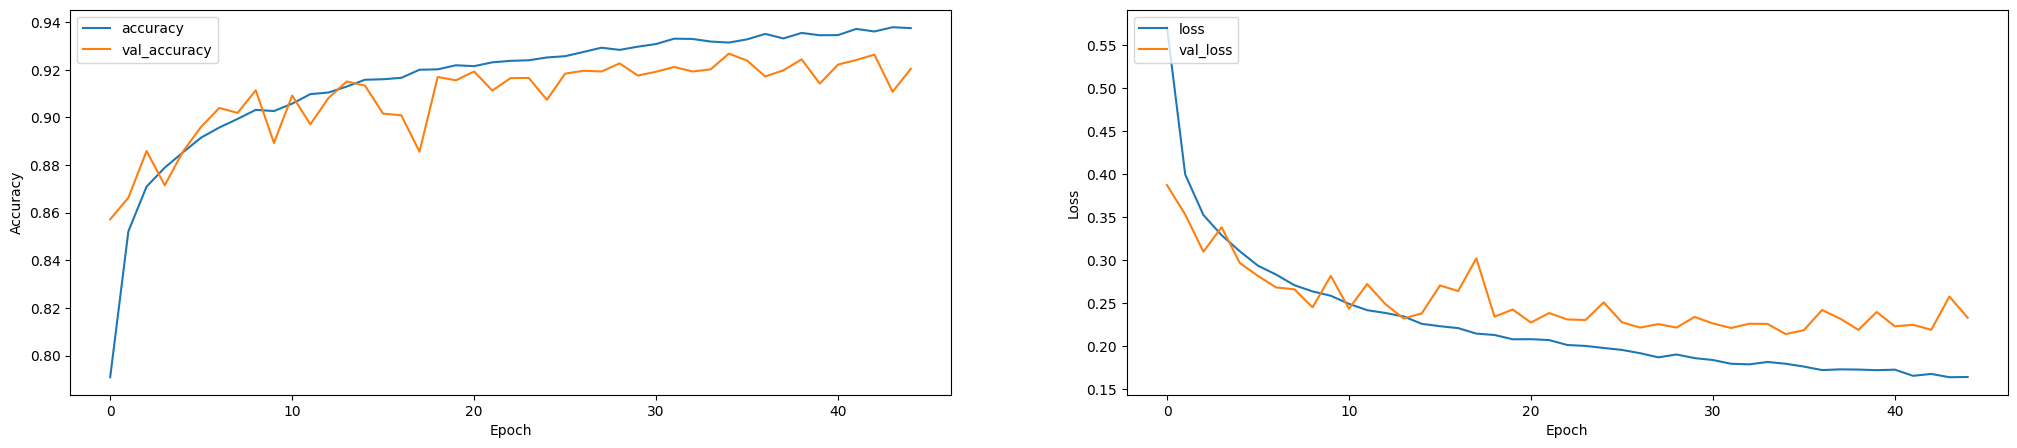

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
#axs[0].set_ylim([0.89,0.92])
axs[0].legend(loc='upper left')

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
#axs[1].set_ylim([0.31, 0.37])
axs[1].legend(loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print(f'Test accuracy: {test_acc:.2f}')
print(f'Test loss: {test_loss:.2f}')

Test accuracy: 0.92
Test loss: 0.22


In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(y_pred[1])

[4.9488110e-05 1.0930463e-11 9.9832684e-01 2.3439745e-07 3.0717420e-04
 2.9488660e-08 1.3161297e-03 6.4270422e-10 1.6212765e-07 4.5280584e-09]


In [ ]:
# Suma de las salidas de softmax
print(np.sum(y_pred[1]))

1.0


In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_pred

313/313 [==============================] - 1s 3ms/step


array([9, 2, 1, ..., 8, 1, 5])

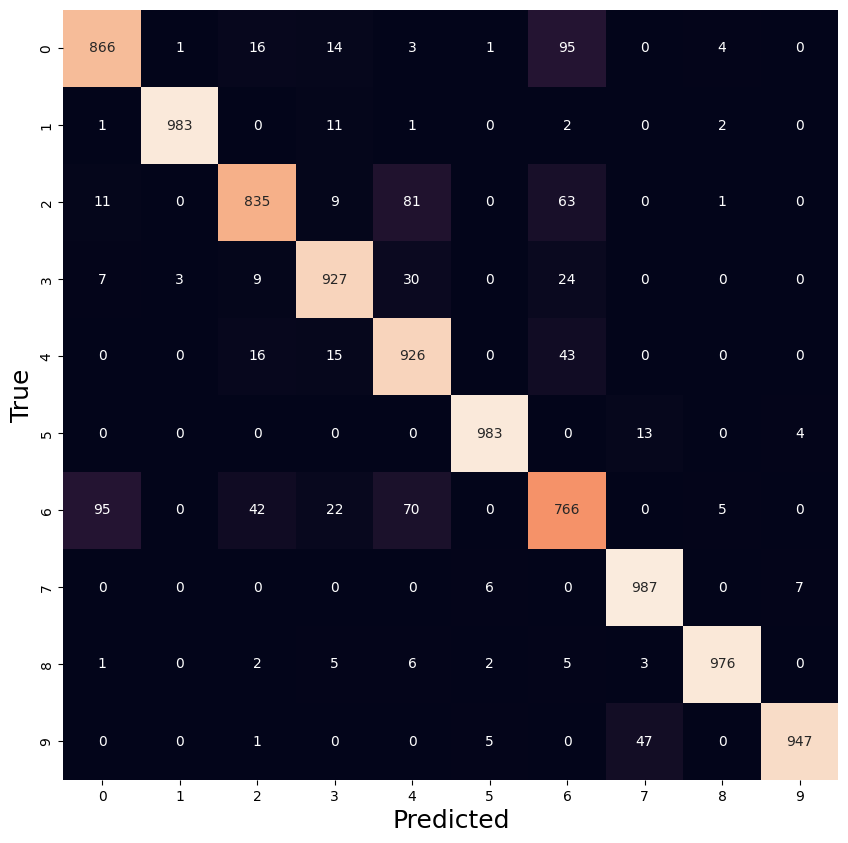

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cf_matrix, annot=True,cbar=False,fmt='d')
plt.xlabel("Predicted", fontsize = 18)
plt.ylabel("True", fontsize = 18)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.91      0.83      0.87      1000
           3       0.92      0.93      0.93      1000
           4       0.83      0.93      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.77      0.77      0.77      1000
           7       0.94      0.99      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
def plot_prediction(index):
    print('Valor real: ',y_test[index])
    print('Predicción: ',y_pred[index])
    plt.figure(figsize=(6,3))
    plt.imshow(x_test[index], cmap='gray')
    plt.axis('off')
    plt.show()

Valor real:  4
Predicción:  4


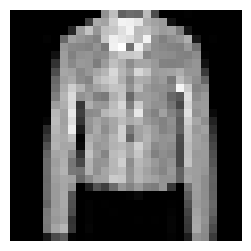

In [ ]:
i = 10
plot_prediction(i)